In [1]:
%tensorflow_version 2.3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf


print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.3`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.1


#Week1 tensor essentials

<h1> tf.Variables</h1>

In [2]:
v1=tf.Variable("hello",tf.string)
c1=tf.constant([1,2,3,4])
v2=tf.Variable([1,2],shape=(2,),dtype=tf.float32)

In [3]:
v2

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [4]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(1,input_shape=(1,))
])

In [5]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.3044738]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [6]:
v2=tf.Variable(initial_value=[1,2])
v21=tf.Variable([1,2],dtype=tf.float32)
v3=tf.Variable(4+3j,dtype=tf.complex64)
v4=tf.Variable([[1,2],[3,4]],dtype=tf.int32)
print(v2)
print(v21)
print(v4)
print(v3)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>
<tf.Variable 'Variable:0' shape=() dtype=complex64, numpy=(4+3j)>


<h1>tf.constant</h1>

In [7]:
c1=tf.constant([1,2,3,4])
c1

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [8]:
c2=tf.constant([1,2,3,4,5,6],shape=(2,3))
c2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
c1=tf.constant(-1,shape=(2,3))
c1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[-1, -1, -1],
       [-1, -1, -1]], dtype=int32)>

**Operations**

In [ ]:
print(tf.add([1,2],[3,4]))
print(tf.square(5))
print(tf.reduce_sum([1,2,3]))


tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [ ]:
v=tf.Variable(0.0,dtype=tf.float32)
v.assign_add(1.0)
v.read_value().numpy()

1.0

In [ ]:
x=np.float32([-1,0,1,2,3,4])
y=np.float32([-3,-1,1,3,5,7])

In [ ]:
W=tf.Variable(np.random.random(),trainable=True)
b=tf.Variable(np.random.random(),trainable=True)

In [ ]:
def simple_loss(real_y,pred_y):
  return tf.abs(real_y-pred_y)

Learning_Rate=0.001

def fit_data(x,y):
  with tf.GradientTape(persistent=True) as tape:
    pred_y=W*x+b
    reg_loss=simple_loss(y,pred_y)
  w_gradient=tape.gradient(reg_loss,W)
  b_gradient=tape.gradient(reg_loss,b)
  W.assign_sub(w_gradient*Learning_Rate)
  b.assign_sub(b_gradient*Learning_Rate)





In [ ]:
for _ in range(500):
  fit_data(x,y)
  print(W.read_value().numpy(),b.read_value().numpy())

0.43832827 0.820687
0.44732827 0.820687
0.45632827 0.820687
0.46532828 0.820687
0.47432828 0.820687
0.48332828 0.820687
0.4923283 0.820687
0.5013283 0.820687
0.5103283 0.820687
0.5193283 0.820687
0.5283283 0.820687
0.5373283 0.820687
0.5463283 0.820687
0.5553283 0.820687
0.5643283 0.820687
0.5733283 0.820687
0.5823283 0.820687
0.5913283 0.820687
0.6003283 0.820687
0.6093283 0.820687
0.61832833 0.820687
0.62732834 0.820687
0.63632834 0.820687
0.64532834 0.820687
0.65432835 0.820687
0.66332835 0.820687
0.67232835 0.820687
0.68132836 0.820687
0.69032836 0.820687
0.69932836 0.820687
0.70832837 0.820687
0.71732837 0.820687
0.7263284 0.820687
0.7353284 0.820687
0.7443284 0.820687
0.7533284 0.820687
0.7623284 0.820687
0.7713284 0.820687
0.7803284 0.820687
0.7893284 0.820687
0.7983284 0.820687
0.8073284 0.820687
0.8163284 0.820687
0.8253284 0.820687
0.8343284 0.820687
0.8433284 0.820687
0.8523284 0.820687
0.8613284 0.820687
0.8703284 0.820687
0.8793284 0.820687
0.88832843 0.820687
0.89732844 0

In [ ]:
## high order functions 
x=tf.ones((2,2))
with tf.GradientTape() as tape :
  tape.watch(x)
  y=tf.reduce_sum(x)
  z=tf.square(y)
tape.gradient(z,x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

In [ ]:
x=tf.constant(3.0)
with tf.GradientTape(persistent=True) as tape :
  tape.watch(x)
  y=x*x
  z=y*y
dx_dy=tape.gradient(y,x)
dz_dx=tape.gradient(z,x)
del tape

In [ ]:
dx_dy

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
x=tf.Variable(1.0)
with tf.GradientTape() as tape1 :
  with tf.GradientTape() as tape2:
    y=x*x*x
  dyx=tape2.gradient(y,x)
d2yx=tape1.gradient(dyx,x)
print(dyx)
print(d2yx)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
n=1
W=tf.Variable(tf.zeros([n,1]),dtype=tf.float32)
b=tf.Variable(tf.zeros([1],dtype=tf.float32))
learning_rate = 0.05
x = [1,2]
# Assuming measured, target data:
y_m = [2, 4]
def loss(y_m,y):
  return tf.reduce_mean(tf.square(y-y_m))
def forward_eger(x):
  return W*x+b

with tf.GradientTape() as t:
  cost=loss(y_m,forward_eger(x))

dw,db=t.gradient(cost,[W,b])

print("w",dw)
print("b",db)
W.assign_sub(learning_rate * dw)
b.assign_sub(learning_rate * db)

print("Current W parameter: ", W)
print("Current b parameter: ",b)

print(W.numpy())
print(b.numpy())



w tf.Tensor([[-10.]], shape=(1, 1), dtype=float32)
b tf.Tensor([-6.], shape=(1,), dtype=float32)
Current W parameter:  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.5]], dtype=float32)>
Current b parameter:  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3], dtype=float32)>
[[0.5]]
[0.3]


In [ ]:
dataset_training_size = 100
# TRUE vlaues of the parameters
Wt = 0.2
bt = 0.4

epochs=range(100)
# Noise
noise = 0
# noise = np.random.rand(dataset_training_size).astype(np.float32)/20

# Assume that our true model is y = Wt* x  + bt + noise
# Generate sequential x values
x_t = np.linspace(0, 1, dataset_training_size).astype(np.float32)
x_training = x_t.reshape(dataset_training_size, 1)
W_training = np.array([Wt])

batch_size=16
y_t = (np.dot(x_training, W_training.T)+bt+noise).astype(np.float32)
y_training = np.transpose(np.array([y_t]))
def train():

  for epoch in epochs:
      
      with tf.GradientTape() as t:
          # Trainable variables are tracked by GradientTape
          if batch_size == dataset_training_size:  # Batch (full) Gradient Descent
            cost = loss(y_training, forward_eager(x_training))
          else:  # Stochastic (Mini-Batch) Gradient Descent
            idxs = np.random.choice(dataset_training_size, batch_size)
            batch_x_training = x_training[idxs]
            batch_y_training = y_training[idxs]
            cost = loss(batch_y_training, forward_eger(batch_x_training))
      dw,db=t.gradient(cost,[W,b])
      W.assign_sub(learning_rate * dw)
      b.assign_sub(learning_rate * db)
      cost=loss(y_training,forward_eger(x_training))
      print("Loss (all, after W/b update)= ", cost)


In [ ]:
train()

Loss (all, after W/b update)=  tf.Tensor(0.0091302935, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.008383092, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.0077443616, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.007274824, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.006677609, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.006585104, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.006392454, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.0063322703, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.006283532, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.0060795033, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.0057632844, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.0057097063, shape=(), dtype=float32)
Loss (all, after W/b update)=  tf.Tensor(0.005

In [ ]:
class model(object):
  def __init__(self):
    self.w=tf.Variable(2.0)
    self.b=tf.Variable(1.0)
  def __call__(self,x):
    return self.w*x+self.b
Model=model()

In [ ]:
def loss(predicted_y,real_y):
  return tf.reduce_mean(tf.square(predicted_y-real_y))

In [ ]:
true_w=3.0
true_b=2.0
n_example=1000
xs=np.random.random([1000])
ys=(true_w*xs)+true_b

In [ ]:
def train(model,x,y,learning_rate):
  with tf.GradientTape() as tape:
      reg_loss=loss(Model(x),y)
  dw,db=tape.gradient(reg_loss,[Model.w,Model.b])
  Model.w.assign_sub(dw*learning_rate)
  Model.b.assign_sub(db*learning_rate)
  return reg_loss
  

In [ ]:
Model=model()
list_w,list_b=[],[]
losses=[]
epochs=range(50)
for epoch in epochs:
  current_loss=train(Model,xs,ys,0.01)
  losses.append(current_loss)
  print("loss of network",current_loss)


loss of network tf.Tensor(2.3321874, shape=(), dtype=float32)
loss of network tf.Tensor(2.216036, shape=(), dtype=float32)
loss of network tf.Tensor(2.105694, shape=(), dtype=float32)
loss of network tf.Tensor(2.0008724, shape=(), dtype=float32)
loss of network tf.Tensor(1.9012935, shape=(), dtype=float32)
loss of network tf.Tensor(1.8066952, shape=(), dtype=float32)
loss of network tf.Tensor(1.7168292, shape=(), dtype=float32)
loss of network tf.Tensor(1.6314579, shape=(), dtype=float32)
loss of network tf.Tensor(1.5503564, shape=(), dtype=float32)
loss of network tf.Tensor(1.4733115, shape=(), dtype=float32)
loss of network tf.Tensor(1.40012, shape=(), dtype=float32)
loss of network tf.Tensor(1.3305895, shape=(), dtype=float32)
loss of network tf.Tensor(1.2645361, shape=(), dtype=float32)
loss of network tf.Tensor(1.2017864, shape=(), dtype=float32)
loss of network tf.Tensor(1.1421746, shape=(), dtype=float32)
loss of network tf.Tensor(1.0855443, shape=(), dtype=float32)
loss of netw

<h3> Using keras Backend </h3>

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
##simple layer 
input=tf.keras.layers.Input((1))
hidden=tf.keras.layers.Dense(1,name="FC1")(input)
generator=tf.keras.models.Model(input,hidden)

In [ ]:
x = np.array([1,2,10,20])

generator(x,training=True)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[ 0.61650336],
       [ 1.2330067 ],
       [ 6.1650333 ],
       [12.330067  ]], dtype=float32)>

In [ ]:
def loss(y_m,y) :
  return K.sum(K.square(y_m-y))
x = np.array([1,2])
# Assuming measured, target data:
y_m = np.array([2, 4])
with tf.GradientTape() as t:
  preds=generator(x,training=True)
  cost=loss(y_m,preds)

grads=t.gradient(cost,generator.get_layer("FC1").trainable_variables)
print(grads)




[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-23.669933]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-16.60196], dtype=float32)>]


In [ ]:
dataset_training_size = 100
# TRUE vlaues of the parameters

epochs=range(100)
# Noise
noise = 0
# noise = np.random.rand(dataset_training_size).astype(np.float32)/20

# Assume that our true model is y = Wt* x  + bt + noise
# Generate sequential x values
x_t = np.linspace(0, 1, dataset_training_size).astype(np.float32)
x_training = x_t.reshape(dataset_training_size, 1)
W_training = np.array([Wt])
Wt = 0.2
bt = 0.4
batch_size=8
y_t = (np.dot(x_training, W_training.T)+bt+noise).astype(np.float32)
y_training = np.transpose(np.array([y_t]))
def train():

  for epoch in epochs:
      
      with tf.GradientTape() as t:
          # Trainable variables are tracked by GradientTape
          if batch_size == dataset_training_size:  # Batch (full) Gradient Descent
            cost = loss(y_training, generator(x_training))
          else:  # Stochastic (Mini-Batch) Gradient Descent
            idxs = np.random.choice(dataset_training_size, batch_size)
            batch_x_training = x_training[idxs]
            batch_y_training = y_training[idxs]
            cost = loss(batch_y_training, generator(batch_x_training))
      grads=t.gradient(cost,generator.get_layer("FC1").trainable_variables)
      print("loss",cost)


In [ ]:
train()

loss tf.Tensor(4.200507, shape=(), dtype=float32)
loss tf.Tensor(8.50203, shape=(), dtype=float32)
loss tf.Tensor(5.5400505, shape=(), dtype=float32)
loss tf.Tensor(4.219263, shape=(), dtype=float32)
loss tf.Tensor(8.00651, shape=(), dtype=float32)
loss tf.Tensor(9.174455, shape=(), dtype=float32)
loss tf.Tensor(6.1391363, shape=(), dtype=float32)
loss tf.Tensor(5.5865855, shape=(), dtype=float32)
loss tf.Tensor(6.2451267, shape=(), dtype=float32)
loss tf.Tensor(6.6550064, shape=(), dtype=float32)
loss tf.Tensor(7.6788573, shape=(), dtype=float32)
loss tf.Tensor(4.955679, shape=(), dtype=float32)
loss tf.Tensor(4.638019, shape=(), dtype=float32)
loss tf.Tensor(4.5381794, shape=(), dtype=float32)
loss tf.Tensor(7.0989776, shape=(), dtype=float32)
loss tf.Tensor(5.3122454, shape=(), dtype=float32)
loss tf.Tensor(5.865771, shape=(), dtype=float32)
loss tf.Tensor(6.3121824, shape=(), dtype=float32)
loss tf.Tensor(7.1214504, shape=(), dtype=float32)
loss tf.Tensor(5.3030295, shape=(), dtype

In [ ]:
import tensorflow_datasets as tfds
import math
from tqdm import tqdm 

In [ ]:
train_data,info=tfds.load("fashion_mnist",as_supervised=True,split='train',with_info=True)
test_data=tfds.load("fashion_mnist",as_supervised=True,split='test')


In [ ]:
def process_data(image,label):
    image=tf.reshape(image,[-1])
    image = tf.cast(image , tf.float32)
    image = image / 255.0
    return image , label

In [ ]:
train_data=train_data.shuffle(buffer_size=1024).map(process_data)
test_data=test_data.map(process_data)


In [ ]:
train_data

<MapDataset shapes: ((784,), ()), types: (tf.float32, tf.int64)>

In [ ]:
batch_size=64
train=train_data.shuffle(buffer_size=1024).batch(batch_size)
test=test_data.batch(batch_size)
print(test)
print(train)

<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int64)>
<BatchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
def base_model():
    input=tf.keras.layers.Input(shape=(28*28))
    x = tf.keras.layers.Dense(64 , activation='relu' , name = "dense1")(input)
    x = tf.keras.layers.Dense(64 , activation='relu' , name = "dense2")(x)
    output = tf.keras.layers.Dense(10 , activation='softmax' , name="output_layer")(x)
    model = tf.keras.Model(inputs = input , outputs = output)
    return model

In [ ]:
loss_object=tf.keras.losses.SparseCategoricalCrossentropy()
optimizer=tf.keras.optimizers.Adam()
train_acc_metrics=tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metrics=tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
def apply_gradient(optimizer,model,x,y):
  with tf.GradientTape() as tape:
    logits=model(x)
    loss=loss_object(y_true=y,y_pred=logits)
  gradients=tape.gradient(loss,model.trainable_variables)
  optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  return logits,loss
def perform_validation():
  losses=[]
  for x_val,y_val in test:
    logits=model1(x_val)
    loss=loss_object(y_true=y_val,y_pred=logits)
    losses.append(loss)
    val_acc_metrics(y_val,logits)
  return losses

In [ ]:
def train_one_epoch(model,data_train):
  losses=[]
  pbar=tqdm(len(list(enumerate(data_train))),position=0,leave=True,bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}')
  for step ,(x_train_batch,y_train_batch) in enumerate(data_train):
    logits,loss_values=apply_gradient(optimizer,model1,x_train_batch,y_train_batch)
    losses.append(loss_values)
    train_acc_metrics(y_train_batch,logits)
    pbar.set_description("Training loss for steps %s:%.f4"%(int(step),float(loss_values)))
    pbar.update()
  return losses

In [ ]:
model1=base_model()
model1.summary()
epochs=10
epoch_val_loss,epoch_train_loss=[],[]
for epoch in range(epochs):
  losses_train=train_one_epoch(model1,data_train=train)
  train_acc=train_acc_metrics.result()
  val_losses=perform_validation()
  valid_acc=val_acc_metrics.result()
  train_loss_mean=np.mean(losses_train)
  valid_loss_mean=np.mean(val_losses)

  epoch_val_loss.append(valid_loss_mean)
  epoch_train_loss.append(train_loss_mean)
  print("\n Epochs %s Training loss:%.4f, validation loss:%.4f ,train acc:%.4f valid acc:%4.f"%(epoch,float(train_loss_mean),float(valid_loss_mean),float(train_acc),


                                                                                              float(valid_acc)))
  train_acc_metrics.reset_states()
  val_acc_metrics.reset_states()


Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 64)                50240     
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Training loss for steps 937:04: |          | 938/?



 Epochs 0 Training loss:0.5351, validation loss:0.4489 ,train acc:0.8126 valid acc:   1


Training loss for steps 937:14: |          | 938/?



 Epochs 1 Training loss:0.3859, validation loss:0.3967 ,train acc:0.8597 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 2 Training loss:0.3520, validation loss:0.4082 ,train acc:0.8710 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 3 Training loss:0.3257, validation loss:0.3646 ,train acc:0.8809 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 4 Training loss:0.3077, validation loss:0.3733 ,train acc:0.8867 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 5 Training loss:0.2981, validation loss:0.3694 ,train acc:0.8912 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 6 Training loss:0.2817, validation loss:0.3408 ,train acc:0.8961 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 7 Training loss:0.2711, validation loss:0.3509 ,train acc:0.8992 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 8 Training loss:0.2618, validation loss:0.3423 ,train acc:0.9034 valid acc:   1


Training loss for steps 937:04: |          | 938/?



 Epochs 9 Training loss:0.2523, validation loss:0.3549 ,train acc:0.9055 valid acc:   1


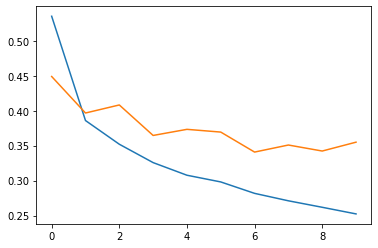

In [ ]:
tr=[]
for loss in epoch_train_loss:
    tr.append(loss)
val=[]
for valloss in epoch_val_loss:
    val.append(valloss)
plt.plot(tr)
plt.plot(val)

<h1>Graph_mode
<h2>AutoGraph

In [ ]:
@tf.function
def add(a,b):
  return a+b
a=tf.Variable([[1.0,2.0],[3.0,4.0]])
b=tf.Variable([[1.0,5.0],[3.0,4.0]])
print(add(a,b))
print(tf.autograph.to_code(add.python_function))

tf.Tensor(
[[2. 7.]
 [6. 8.]], shape=(2, 2), dtype=float32)
def tf__add(a, b):
    with ag__.FunctionScope('add', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (ag__.ld(a) + ag__.ld(b))
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
@tf.function
def fizzbuzz(max_length):
  counter=0
  for num in range(max_length):
    if num% 3 ==0 and num % 5==0:
      print("fizzbuz")
    elif num % 3==0:
      print('fizz')
    elif num % 5 ==0:
      print('buzz')
    else:
      print(num)
    counter+=1
  return counter


In [ ]:
print((tf.autograph.to_code(fizzbuzz.python_function)))

def tf__fizzbuzz(max_length):
    with ag__.FunctionScope('fizzbuzz', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        counter = 0

        def get_state_3():
            return (counter,)

        def set_state_3(vars_):
            nonlocal counter
            (counter,) = vars_

        def loop_body(itr):
            nonlocal counter
            num = itr

            def get_state_2():
                return ()

            def set_state_2(block_vars):
                pass

            def if_body_2():
                ag__.ld(print)('fizzbuz')

            def else_body_2():

                def get_state_1():
                    return ()

                def set_state_1(block_vars):
                    pass

                def if_body_1():
                    ag__.ld(print)('fizz')

                def else_body_

In [ ]:
a=tf.Variable(1.0)
b=tf.Variable(2.0)
@tf.function
def f(x,y):
  a.assign_add(y*b)
  b.assign_add(x*a)
  return a+b
print(f(2.0,1.0))

tf.Tensor(11.0, shape=(), dtype=float32)


In [ ]:
@tf.function
def sign(x):
  if x>0:
    return "positive"
  if x<0:
    return negetive
print((tf.autograph.to_code(sign.python_function)))

def tf__sign(x):
    with ag__.FunctionScope('sign', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state_1():
            return (retval_, do_return)

        def set_state_1(vars_):
            nonlocal retval_, do_return
            (retval_, do_return) = vars_

        def if_body_1():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = 'positive'
            except:
                do_return = False
                raise

        def else_body_1():
            nonlocal retval_, do_return

            def get_state():
                return (retval_, do_return)

            def set_state(vars_):
                nonlocal retval_, do_return
                (retval_, do_return) = vars_

            def if_body():
                nonlocal retval_,

In [ ]:
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [ ]:
splits, info = tfds.load('horses_or_humans', as_supervised=True, with_info=True, split=['train[:80%]', 'train[80%:]', 'test'], data_dir='./data')

(train_examples, validation_examples, test_examples) = splits

KeyboardInterrupt: ignored

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 224

In [ ]:
@tf.

In [ ]:
def download_prepare_images(h, w, urls, cm='grayscale'):
  '''
  Downloads images from urls and process them (scale, color mode, normalize).

  Parameters:
      h (int): Height to which images will be rescaled.
      w (int): Width to which images will be rescaled.
      urls (dict): Dictionary of urls (img_label: url) with images to download.
      cm (str): Color mode.
 
  Return:
      List of preprocessed images.
  '''

  images = []

  for name, url in urls.items():
    img_path = tf.keras.utils.get_file(name, origin=url)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(h, w), 
                                             color_mode=cm)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    images.append((img_array-img_array.mean())/img_array.std())

  return np.array(images)

In [ ]:
def plot_images(images, labels=[], values_on=[], 
                show_symbols=False, cols=3,
                cmap='gray',vmin=None, vmax=None):
  '''
  Displays images with optional labels and pixel values.

  Parameters:
      images (list): The list of images to be displayed.
      labels (list): The list of labels corresponding to passed images.
      values_on (list): The list of indexes specyfying images, 
        for which data values should be annotated on plotted figures.
      show_symbols (Bool): If True images at even indexes will be surrounded 
        with * and = for displaying convolution operation.
      cols (int): The number of columns for plotting data.
      cmap (string): The color map used for visualization.
      vmin, vmax (float): The minimum/maximum value of colormap range.
      
  '''
  # Determine number of rows based on number of images.   
  cols = cols
  rows = math.ceil(len(images)/cols)
  mid_cell = cols//2

  fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(20,20))
  for i in range(rows):
    for j in range(cols):
      # Skip data if fewer images than multiply of cols were provided
      try:
        image = images[j+i*cols]
      except:
        return
      
      # For 1 row index can't be a tuple
      index = j if rows==1 else (i,j)

      # Set nan pictures as transparent (useful for convolution puzzle)
      alpha = 0 if np.isnan(np.sum(image)) else 1
      
      # Display image at given subplot
      if image.ndim==3 and image.shape[2] == 1:
        image = np.squeeze(image)
      ax[index].imshow(image, cmap=cmap, alpha=alpha,
                       extent=(0, image.shape[0], 0, image.shape[1]),
                       interpolation='nearest', vmin=vmin, vmax=vmax)
      
      # Display titles if specified
      if j+i*cols < len(labels):
        ax[index].title.set_text(labels[j+i*cols])

      # Skip value annotation for matrices > 9x9 (visualization limitations)
      if j in values_on:
        ax[index].set_yticks(np.array(range(0,image.shape[0])), minor=False)
        ax[index].set_xticks(np.array(range(0,image.shape[1])), minor=False)
        ax[index].grid(linewidth=3)
        if image.shape > (9, 9):
          warnings.warn("Input at index {j} is too big to display pixel values") 
          continue

        # Show convolution math operators  
        if show_symbols and j == mid_cell:
          ax[index].text(-image.shape[1]*1/10, image.shape[0]/2, "*", 
                         fontsize=45, ha="center", va="center")
          ax[index].text(image.shape[1]*11/10, image.shape[0]/2, "=", 
                         fontsize=45, ha="center", va="center")

        # Show values. If array is empty display red question marks.
        for k_i in range(len(image)):
          for k_j in range(len(image[0])):
            v = image[len(image)-1-k_i, k_j]
            color = "y"
            if np.isnan(v):
                v = '?'
                color = 'r'
            ax[index].text(k_j+1/2, k_i+1/2, v, ha="center", va="center", 
                           color=color, fontsize=20)
  fig

In [ ]:
scale = 32
height = int(4032/scale)
width = int(3024/scale)

images_urls = {
    "cat"       : "https://storage.googleapis.com/issondl-storage/IMG-7106.jpg",
    "car"       : "https://storage.googleapis.com/issondl-storage/IMG-5279.jpg",
    "cake"      : "https://storage.googleapis.com/issondl-storage/IMG-6002.jpg",
    "baby"      : "https://storage.googleapis.com/issondl-storage/IMG_7176.jpg",
    "grad"      : "https://storage.googleapis.com/issondl-storage/grad.jpg",
    }

imgs = download_prepare_images(urls=images_urls, h=height, w=width)

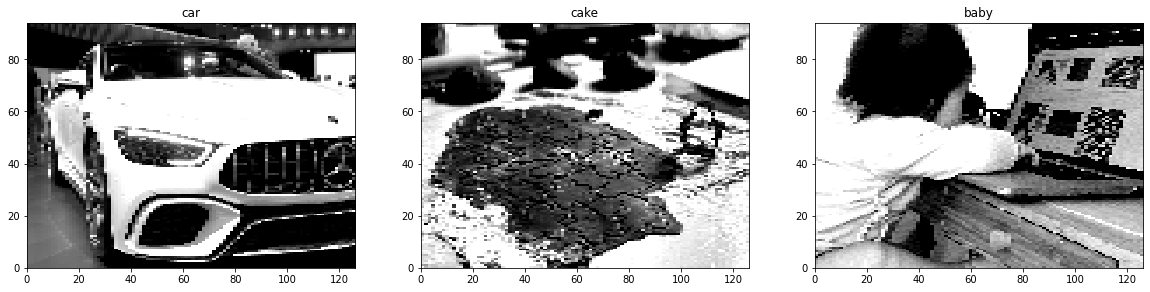

In [ ]:
arr = np.array([
                [0,1],
                [2,3],
                ])
plot_images(imgs[1:4],
            labels = [*images_urls][1:4],
            vmin=-1,
            vmax=1)

In [ ]:
kernels = {
    "vertical":     np.array([
                          [-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1],
                          ]),
    "sharp_3x3":    np.array([
                          [0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0],
                          ]),
    "sharp_5x5":    np.array([
                          [-25, -1, -1, -1, -1],
                          [-1, -25, -1, -1, -1],
                          [-1, -1, -25, -1, -1],
                          [-1, -1, -1, -25, -1],
                          [-1, -1, -1, -1, -25],
                          
                          ]),
    "laplacian":    np.array([
                          [0,   0,  1,  0,  0],
                          [0,   1,  2,  1,  0],
                          [ 1,  2, -16, 2,  1],
                          [0,   1,  2,  1,  0],
                          [0,   0,  1,  0,  0],
                          ])
}
kernels["horizontal"] = kernels["vertical"].T


In [ ]:
def conv2(input,kernel,strides,padding):
  if input.ndim==2:
    input=input[np.newaxis,...,np.newaxis]
  if input.ndim==3:
    input=input[np.newaxis,...]
  k_shape=kernel.shape
  if kernel.ndim == 2:
    k_shape=(*kernel.shape, 1, 1)
  kernel_c=tf.constant(kernel,dtype=tf.float32,shape=k_shape)
  out=tf.nn.conv2d(input,kernel_c,strides,padding)
  return out.numpy()

In [ ]:
k = kernels['sharp_5x5']
img_id = 0
out=conv2(imgs,k,[1,1,1,1],padding="SAME")

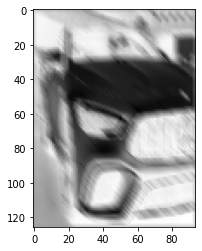

In [ ]:
plt.imshow(np.squeeze(out[1]),cmap='gray')

In [ ]:
input=tf.keras.layers.Input((126,94,1),name='input')
BN=tf.keras.layers.BatchNormalization()(input)
conv_model1=tf.keras.layers.Conv2D(128,5,padding="same")(BN)
conv_model1=tf.keras.layers.Conv2D(128,3,padding="same")(conv_model1)
max1=tf.keras.layers.AveragePooling2D((2,2))(conv_model1)
conv_model2=tf.keras.layers.Conv2D(256,5,padding="same")(max1)
conv_model2=tf.keras.layers.Conv2D(256,3,padding="same")(conv_model2)
conv_model3=tf.keras.layers.Conv2D(1,kernel_size=1,padding="valid")(conv_model2)
conv_model=tf.keras.models.Model(input,conv_model3)


In [ ]:
conv_model.summary()

Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 126, 94, 1)]      0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 126, 94, 1)        4         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 126, 94, 128)      3328      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 126, 94, 128)      147584    
_________________________________________________________________
average_pooling2d_14 (Averag (None, 63, 47, 128)       0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 63, 47, 256)       819456    
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 63, 47, 256)     

In [ ]:
function=K.function(conv_model.inputs,conv_model.outputs)

In [ ]:
out1=function(imgs[3][np.newaxis,...])

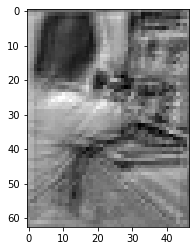

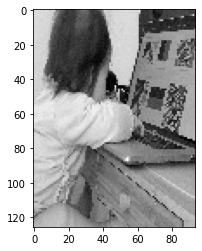

In [ ]:
plt.imshow(np.squeeze(out1),cmap='gray')
plt.figure()
plt.imshow(np.squeeze(imgs[3]),cmap='gray')

In [ ]:
for i in kernels.values():
  print(i)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
[[-25  -1  -1  -1  -1]
 [ -1 -25  -1  -1  -1]
 [ -1  -1 -25  -1  -1]
 [ -1  -1  -1 -25  -1]
 [ -1  -1  -1  -1 -25]]
[[  0   0   1   0   0]
 [  0   1   2   1   0]
 [  1   2 -16   2   1]
 [  0   1   2   1   0]
 [  0   0   1   0   0]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [ ]:
class custom_conv(tf.keras.layers.Layer):
  def __init__(self,strides,padding):
    super(custom_conv,self).__init__()
    self.kernel=kernels['sharp_5x5']
    self.strides=strides
    self.padding=padding
  def call(self,inputs):
    kernel_shape=self.kernel.shape
    if self.kernel.ndim == 2:
      k_shape=(*self.kernel.shape, 1, 1)
    kernel_c=tf.constant(self.kernel,dtype=tf.float32,shape=k_shape)
    out=tf.nn.conv2d(inputs,kernel_c,self.strides,self.padding)
    return out


In [ ]:
input=tf.keras.layers.Input((126,94,1),name='input')
custom_conv(strides=[1,1,1,1],padding="SAME")(input)



<tf.Tensor 'custom_conv_36/Conv2D:0' shape=(None, 126, 94, 1) dtype=float32>

In [ ]:
input=tf.keras.layers.Input((126,94,1),name='input')
custom=custom_conv(strides=[1,1,1,1],padding="SAME")(input)
conv_model1=tf.keras.layers.Conv2D(128,5,padding="same")(custom)
conv_model1=tf.keras.layers.Conv2D(128,3,padding="same")(conv_model1)
max1=tf.keras.layers.AveragePooling2D((2,2))(conv_model1)
conv_model2=tf.keras.layers.Conv2D(256,5,padding="same")(max1)
conv_model2=tf.keras.layers.Conv2D(256,3,padding="same")(conv_model2)
conv_model3=tf.keras.layers.Conv2D(1,kernel_size=1,padding="valid")(conv_model2)
conv_model=tf.keras.models.Model(input,conv_model3)

In [ ]:
conv_model.summary()

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 126, 94, 1)]      0         
_________________________________________________________________
custom_conv_45 (custom_conv) (None, 126, 94, 1)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 126, 94, 128)      3328      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 126, 94, 128)      147584    
_________________________________________________________________
average_pooling2d_20 (Averag (None, 63, 47, 128)       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 63, 47, 256)       819456    
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 63, 47, 256)     

In [ ]:
function=K.function(conv_model.inputs,conv_model.outputs)

In [ ]:
out1=function(imgs[2][np.newaxis,...])

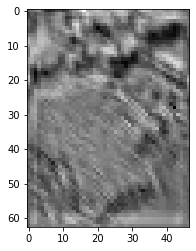

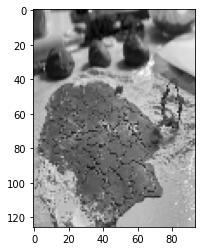

In [ ]:
plt.imshow(np.squeeze(out1),cmap='gray')
plt.figure()
plt.imshow(np.squeeze(imgs[2]),cmap='gray')

In [ ]:
import pandas as pd 


In [ ]:
mobilenet=tf.keras.applications.MobileNet(input_shape=(224,224,3),weights='imagenet',include_top=True)
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
model=mobilenet
layer_names=[]
features=[]
biases=[]
for layer in model.layers:
  if 'conv'in layer.name:
    if '_bn' not in layer.name:
      if '_relu' not in layer.name:
        layer_names.append(layer.name)
        filter=np.array(layer.output.shape)
        features.append(filter)
  #biases.append(bias)
features

[array([None, 112, 112, 32], dtype=object),
 array([None, 112, 112, 32], dtype=object),
 array([None, 112, 112, 64], dtype=object),
 array([None, 113, 113, 64], dtype=object),
 array([None, 56, 56, 64], dtype=object),
 array([None, 56, 56, 128], dtype=object),
 array([None, 56, 56, 128], dtype=object),
 array([None, 56, 56, 128], dtype=object),
 array([None, 57, 57, 128], dtype=object),
 array([None, 28, 28, 128], dtype=object),
 array([None, 28, 28, 256], dtype=object),
 array([None, 28, 28, 256], dtype=object),
 array([None, 28, 28, 256], dtype=object),
 array([None, 29, 29, 256], dtype=object),
 array([None, 14, 14, 256], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([None, 14, 14, 512], dtype=object),
 array([

In [ ]:
results=dict()
results['Layer_names']=layer_names
results['Parameters']=features

In [ ]:
df=pd.DataFrame.from_dict(results)

In [ ]:
print(df.to_latex(index=False))

\begin{tabular}{ll}
\toprule
 Layer\_names &            Parameters \\
\midrule
       conv1 &  [None, 112, 112, 32] \\
   conv\_dw\_1 &  [None, 112, 112, 32] \\
   conv\_pw\_1 &  [None, 112, 112, 64] \\
  conv\_pad\_2 &  [None, 113, 113, 64] \\
   conv\_dw\_2 &    [None, 56, 56, 64] \\
   conv\_pw\_2 &   [None, 56, 56, 128] \\
   conv\_dw\_3 &   [None, 56, 56, 128] \\
   conv\_pw\_3 &   [None, 56, 56, 128] \\
  conv\_pad\_4 &   [None, 57, 57, 128] \\
   conv\_dw\_4 &   [None, 28, 28, 128] \\
   conv\_pw\_4 &   [None, 28, 28, 256] \\
   conv\_dw\_5 &   [None, 28, 28, 256] \\
   conv\_pw\_5 &   [None, 28, 28, 256] \\
  conv\_pad\_6 &   [None, 29, 29, 256] \\
   conv\_dw\_6 &   [None, 14, 14, 256] \\
   conv\_pw\_6 &   [None, 14, 14, 512] \\
   conv\_dw\_7 &   [None, 14, 14, 512] \\
   conv\_pw\_7 &   [None, 14, 14, 512] \\
   conv\_dw\_8 &   [None, 14, 14, 512] \\
   conv\_pw\_8 &   [None, 14, 14, 512] \\
   conv\_dw\_9 &   [None, 14, 14, 512] \\
   conv\_pw\_9 &   [None, 14, 14, 512] \\

# Custom model and loss function

#Custom loss

In [ ]:
xs=np.array([-1.0,0.0,1.0,2.0,3.0,4,0],dtype=float)
ys=np.array([-3,-1,0,1,3,5,7],dtype=float)

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=[1])])
model.compile(optimizer='sgd',loss=tf.keras.losses.mean_squared_error)
model.fit(xs,ys,epochs=500,verbose=0)
model.predict([10.0])

array([[10.048039]], dtype=float32)

In [ ]:
def huber_loss(y_true,y_pred):
  threshold=1
  error=y_true-y_pred
  condition=tf.abs(error)<=threshold
  small_loss=tf.square(error)/2
  big_loss=threshold*(tf.abs(error-(0.5*threshold)))
  return tf.where(condition,small_loss,big_loss)

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=[1])])
model.compile(optimizer='sgd',loss=huber_loss)
model.fit(xs,ys,epochs=500,verbose=0)
model.predict([10.0])

array([[12.594231]], dtype=float32)

#make inharitance Loss

In [12]:
class Myhuberloss(tf.keras.losses.Loss):
  threshold=1
  def __init__(self,threshold):
    super().__init__()
    self.threshold=threshold
  def call(self,y_true,y_pred):
    error=y_true-y_pred
    condition=tf.abs(error)<=self.threshold
    small_loss=tf.square(error)/2
    big_loss=self.threshold*(tf.abs(error-(0.5*self.threshold)))
    return tf.where(condition,small_loss,big_loss)


In [13]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=[1])])
model.compile(optimizer='sgd',loss=Myhuberloss(threshold=1.02))
model.fit(xs,ys,epochs=500,verbose=0)
model.predict([10.0])

NameError: ignored

In [14]:
import tensorflow.keras.backend as k 
import random

In [15]:
def contrastive_loss(y_true,y_pred):
  margin=1
  square_pred=k.square*y_pred
  margin_square=k.square(k.maximum(margin-y_pred,0))
  return k.mean(y_true*square_pred+(1-y_true)*margin_square)

In [16]:
class Contrastive_loss(tf.keras.losses.Loss):
  margin=1
  def __init__(self,margin):
    super().__init__()
    self.margin=margin
  def call(self,y_true,y_pred):
    square_pred=k.square(y_pred)
    margin_square=k.square(k.maximum(self.margin-y_pred,0))
    return k.mean(y_true*square_pred+(1-y_true)*margin_square)


# Simase Network 

In [17]:
def create_pairs(x,digit_indices):
  pairs=[]
  labels=[]
  n=min([len(digit_indices[d]) for d in range(10)])-1
  for d in range(10):
    for i in range(n):
      z1,z2=digit_indices[d][i],digit_indices[d][i+1]
      pairs+=[[x[z1],x[z2]]]
      inc=random.randrange(1,10)
      dn=(d+inc)%10
      z1,z2=digit_indices[d][i],digit_indices[dn][i+1]
      pairs+=[[x[z1],x[z2]]]
      labels+=[1,0]
  return np.array(pairs),np.array(labels)
def create_pairs_on_set(image,labels):
  digit_indices=[np.where(labels==i)[0] for i in range(10)]
  pairs,y=create_pairs(image,digit_indices)
  y=y.astype("float32")
  return pairs,y

In [18]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")
train_images=train_images/255.0
test_images=test_images/255.0


In [19]:
tr_pairs,tr_labels=create_pairs_on_set(train_images,train_labels)
ts_pairs,ts_labels=create_pairs_on_set(test_images,test_labels)

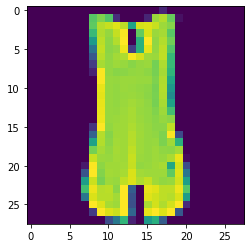

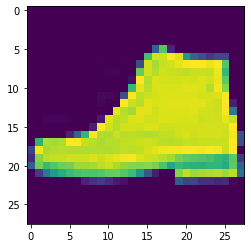

In [20]:
plt.imshow(tr_pairs[5][0])
plt.figure()
plt.imshow(tr_pairs[5][1])

In [21]:
def initialize_network():
  input=tf.keras.layers.Input(shape=(28,28))
  x=tf.keras.layers.Flatten()(input)
  x=tf.keras.layers.Dense(128,activation="relu")(x)
  x=tf.keras.layers.Dropout(0.1)(x)
  x=tf.keras.layers.Dense(128,activation="relu")(x)
  x=tf.keras.layers.Dropout(0.1)(x)
  x=tf.keras.layers.Dense(128,activation="relu")(x)
  x=tf.keras.layers.Dropout(0.1)(x)
  return tf.keras.models.Model(inputs=input,outputs=x)

def eclidean_distance(vects):
  x,y=vects
  sum_square=k.mean(k.square(x-y),axis=1,keepdims=True)
  return k.sqrt(k.maximum(sum_square,k.epsilon()))
def ecl_output_shape(shapes):
  shape1,shape2=shapes
  return (shape[0],1)

In [22]:
base_model=initialize_network()


In [23]:
input_a=tf.keras.layers.Input(shape=(28,28,))
vect_a=base_model(input_a)
input_b=tf.keras.layers.Input(shape=(28,28,))
vect_b=base_model(input_b)
output=tf.keras.layers.Lambda(eclidean_distance,output_shape=ecl_output_shape)([vect_a,vect_b])
model=tf.keras.models.Model(inputs=[input_a,input_b],outputs=output)

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 128)          133504      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

In [25]:
rms=tf.keras.optimizers.RMSprop()
model.compile(optimizer=rms,loss=Contrastive_loss(margin=1))

In [26]:
model.fit([tr_pairs[:,0],tr_pairs[:,1]],tr_labels,epochs=20,batch_size=128,validation_data=([ts_pairs[:,0],ts_pairs[:,1]],ts_labels))

Epoch 1/20
938/938 [==============================] - 5s 3ms/step - loss: 0.1514 - val_loss: 0.1079
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1097 - val_loss: 0.0889
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1031 - val_loss: 0.0805
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0997 - val_loss: 0.0834
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0960 - val_loss: 0.0809
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0937 - val_loss: 0.0730
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0928 - val_loss: 0.0724
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0915 - val_loss: 0.0681
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0899 - val_loss: 0.0743
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0889 - val_loss: 0.0725

In [27]:
def compute_acc(y_true,y_pred):
  pred=y_pred.ravel()>0.5
  return np.mean(y_pred==y_true)

In [28]:
y_pred=model.predict([ts_pairs[:,0],ts_pairs[:,1]])
train_acc=compute_acc(ts_labels,y_pred)
train_acc

0.0

In [29]:
print(y_pred)
print(ts_labels)

[[0.0587399 ]
 [0.84374124]
 [0.0559017 ]
 ...
 [0.8120901 ]
 [0.00649832]
 [0.5960937 ]]
[1. 0. 1. ... 0. 1. 0.]


[0.84374124] 0.0


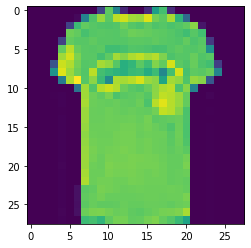

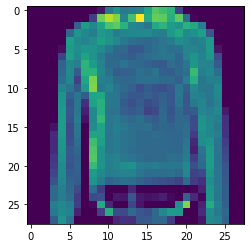

In [30]:
plt.imshow(ts_pairs[:,0][1])
plt.figure()
plt.imshow(ts_pairs[:,1][1])
print(y_pred[1],ts_labels[1])

# Custom layer

In [31]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")
train_images=train_images/255.0
test_images=test_images/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [32]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(lambda x:tf.abs(x)),
  tf.keras.layers.Dense(10,activation="softmax")
])

In [33]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['acc'])

In [34]:
model.fit(train_images,train_labels,epochs=5,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3914 - acc: 0.8927 - val_loss: 0.1059 - val_acc: 0.9685
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0954 - acc: 0.9714 - val_loss: 0.0923 - val_acc: 0.9712
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0632 - acc: 0.9809 - val_loss: 0.0876 - val_acc: 0.9729
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0458 - acc: 0.9862 - val_loss: 0.0796 - val_acc: 0.9766
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0797 - val_acc: 0.9782


In [35]:
def my_relu(x):
  return k.maximum(-.001,x)

In [36]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(my_relu),
  tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['acc'])

In [37]:
model.fit(train_images,train_labels,epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4371 - acc: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1224 - acc: 0.9630
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0794 - acc: 0.9766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0563 - acc: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0459 - acc: 0.9857


In [38]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0769 - acc: 0.9749


[0.07687579840421677, 0.9749000072479248]

In [39]:
##custom inharitance_layer 
class SimpleDense(tf.keras.layers.Layer):
  def __init__(self,unit=32):
    super(SimpleDense,self).__init__()
    self.unit=unit
  def build(self,input_shape):
    w_init=tf.random_normal_initializer()
    self.w=tf.Variable(name="kernel",initial_value=w_init(shape=(input_shape[-1],self.unit),dtype="float32"),trainable=True)
    b_init=tf.zeros_initializer()
    self.b=tf.Variable(name="bias",initial_value=b_init(shape=(self.unit),dtype="float32"),trainable=True)
  def call(self,inputs):
    return tf.matmul(inputs,self.w)+self.b


In [40]:
my_layer=SimpleDense(unit=1)
z=tf.ones(shape=(1,1))
output=my_layer(z)
output

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.03780378]], dtype=float32)>

In [41]:
x=np.float32([-1,0,1,2,3,4])
y=np.float32([-3,-1,1,3,5,7])
my_layer=SimpleDense(unit=1)
model=tf.keras.models.Sequential([my_layer])
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(x,y)

1/1 [==============================] - 0s 220ms/step - loss: 14.6718


In [42]:
my_dense=myDense(unit=128)

NameError: ignored

In [43]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  SimpleDense(unit=128),
  tf.keras.layers.Lambda(my_relu),
  SimpleDense(unit=10),
  tf.keras.layers.Activation('softmax')
])
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['acc'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4929 - acc: 0.8647
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1381 - acc: 0.9599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - acc: 0.9751
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0626 - acc: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - acc: 0.9863


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - acc: 0.9780


[0.07094785571098328, 0.9779999852180481]

In [45]:
##custom inharitance_layer 
class SimpleDense(tf.keras.layers.Layer):
  def __init__(self,unit=32,activation=None):
    super(SimpleDense,self).__init__()
    self.unit=unit
    self.activation=tf.keras.activations.get(activation)
  def build(self,input_shape):
    w_init=tf.random_normal_initializer()
    self.w=tf.Variable(name="kernel",initial_value=w_init(shape=(input_shape[-1],self.unit),dtype="float32"),trainable=True)
    b_init=tf.zeros_initializer()
    self.b=tf.Variable(name="bias",initial_value=b_init(shape=(self.unit),dtype="float32"),trainable=True)
  def call(self,inputs):
    return self.activation(tf.matmul(inputs,self.w)+self.b)

In [46]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28)),
  tf.keras.layers.Flatten(),
  SimpleDense(unit=128),
  tf.keras.layers.Lambda(my_relu),
  SimpleDense(unit=10,activation="softmax"),
])
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['acc'])

In [47]:
model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4965 - acc: 0.8641
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1309 - acc: 0.9621
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0823 - acc: 0.9756
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0612 - acc: 0.9824
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0470 - acc: 0.9856


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0686 - acc: 0.9795


[0.0686212107539177, 0.9794999957084656]



#Custom Network

In [55]:
import tensorflow_datasets as tfds

In [75]:
class Identityblock(tf.keras.Model):
  def __init__(self,filters,kernel_size):
    super(Identityblock,self).__init__(name='')
    self.cn1=tf.keras.layers.Conv2D(filters,kernel_size,padding="same")
    self.bn1=tf.keras.layers.BatchNormalization()
    self.cn2=tf.keras.layers.Conv2D(filters,kernel_size,padding="same")
    self.bn2=tf.keras.layers.BatchNormalization()
    self.act=tf.keras.layers.Activation('relu')
    self.add=tf.keras.layers.Add()

  def call(self,input_t):
    x=self.cn1(input_t)
    x=self.bn1(x)
    x=self.cn2(x)
    x=self.bn2(x)
    x=self.add([x,input_t])
    x=self.act(x)
    return x 

In [84]:
class MiniResnet(tf.keras.Model):
  def __init__(self,num_classes):
    super(MiniResnet,self).__init__()
    self.cn1=tf.keras.layers.Conv2D(64,7,padding="same")
    self.bn=tf.keras.layers.BatchNormalization()
    self.act=tf.keras.layers.Activation('relu')
    self.maxpool=tf.keras.layers.MaxPooling2D((3,3))
    self.id1=Identityblock(64,3)
    self.id2=Identityblock(64,3)
    self.glob=tf.keras.layers.GlobalAveragePooling2D()
    self.classifer=tf.keras.layers.Dense(num_classes,activation="softmax")
  def call(self,inputs):
    x=self.cn1(inputs)
    x=self.bn(x)
    x=self.act(x)
    x=self.maxpool(x)
    x=self.id1(x)
    x=self.id2(x)
    x=self.glob(x)
    return self.classifer(x)


In [85]:
def preprocess(features):
  return tf.cast(features["image"],tf.float32)/255.0,features["label"]

In [86]:
dataset=tfds.load("mnist",split=tfds.Split.TRAIN)

In [87]:
dataset=dataset.map(preprocess).batch(32)

In [88]:
model=MiniResnet(10)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["acc"])
model.fit(dataset,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 6ms/step - loss: 0.3610 - acc: 0.9025
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658 - acc: 0.9808
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0477 - acc: 0.9859
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0411 - acc: 0.9882
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0334 - acc: 0.9905
